In [68]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [81]:
batch = 2

In [82]:
def score(group, domain, batch, n):
    if domain != 9: 
        file = f'results/results_{group}_{domain}_{batch}_{n}.csv'
    else:
        file = f'results/results_{group}_nulls_{n}.csv'
    if os.path.isfile(file):
        df = pd.read_csv(file)
        return df['score'].to_numpy()
    else:
        print(file)
        return np.ones(1)

In [127]:
def plot2d(data, ticks, labels, ylabel, xlabel):
    plt.style.use('classic')
    plt.figure(facecolor='white')
    ax = plt.subplot(111)
    colors = matplotlib.cm.get_cmap('Set1')
    
    for i in range(data.shape[0]):
        plt.plot(ticks, data[i], label=labels[i], linewidth=3, color=colors(i))
    
    #ax.legend(loc='lower right', bbox_to_anchor=(2, 2), ncol=len(labels), fancybox=True, shadow=True)
    ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0.1), ncol=1, fancybox=True, shadow=True)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylim(0, 1.05)
    plt.gca().xaxis.grid(True, linestyle='--')
    plt.gca().yaxis.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()

results/results_2_nulls_0.csv


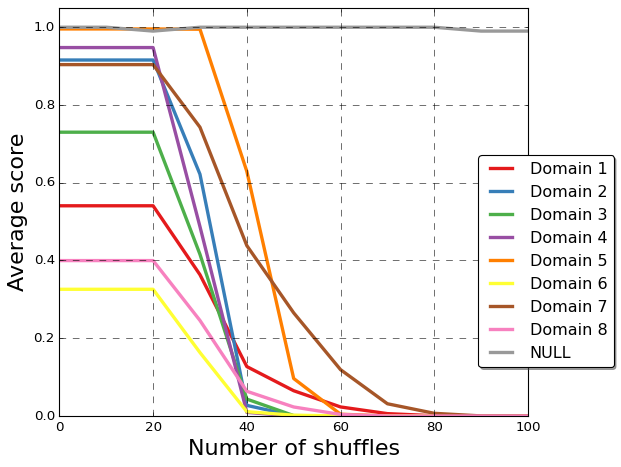

In [130]:
# Fix team, compare domains varying n
team = 2
domains = np.arange(9) + 1
ns = np.array(list(range(0, 110, 10)))

labels = ['Domain '+str(d) for d in domains[:-1]] + ['NULL']
    

scores = np.zeros((domains.shape[0], ns.shape[0]))
for i in range(domains.shape[0]):
    for j in range(ns.shape[0]):
        scores[i, j] = score(team, domains[i], batch, ns[j]).mean()

plot2d(scores, ns, labels, ylabel='Average score', xlabel='Number of shuffles')

results/results_6_1_2_40.csv
results/results_6_1_2_50.csv
results/results_6_1_2_60.csv
results/results_6_1_2_70.csv
results/results_6_1_2_80.csv
results/results_6_1_2_90.csv
results/results_6_1_2_100.csv
Domain 1


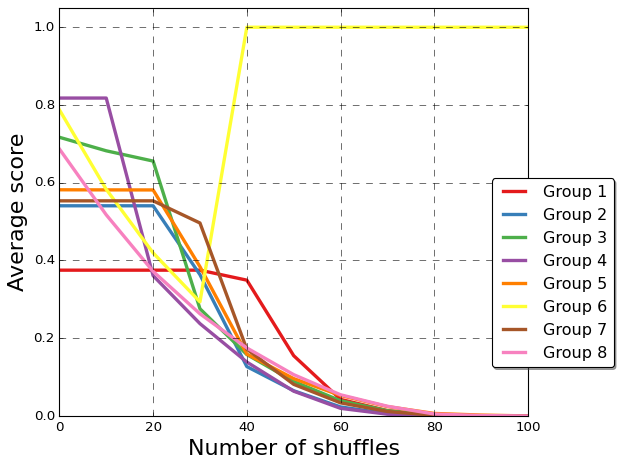

results/results_6_2_2_0.csv
results/results_6_2_2_10.csv
results/results_6_2_2_20.csv
results/results_6_2_2_30.csv
results/results_6_2_2_40.csv
results/results_6_2_2_50.csv
results/results_6_2_2_60.csv
results/results_6_2_2_70.csv
results/results_6_2_2_80.csv
results/results_6_2_2_90.csv
results/results_6_2_2_100.csv
Domain 2


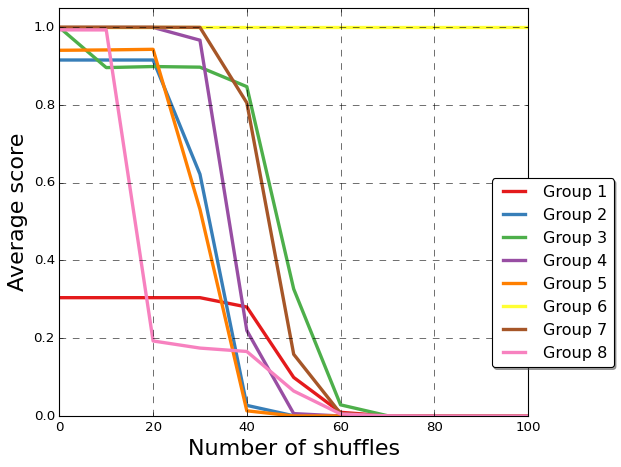

results/results_6_3_2_0.csv
results/results_6_3_2_10.csv
results/results_6_3_2_20.csv
results/results_6_3_2_30.csv
results/results_6_3_2_40.csv
results/results_6_3_2_50.csv
results/results_6_3_2_60.csv
results/results_6_3_2_70.csv
results/results_6_3_2_80.csv
results/results_6_3_2_90.csv
results/results_6_3_2_100.csv
Domain 3


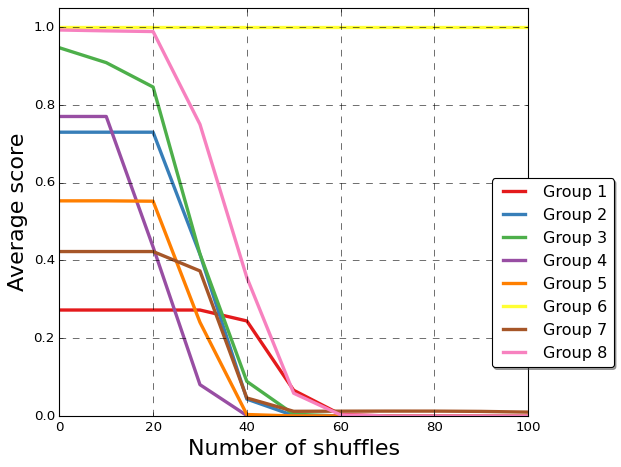

results/results_6_4_2_0.csv
results/results_6_4_2_10.csv
results/results_6_4_2_20.csv
results/results_6_4_2_30.csv
results/results_6_4_2_40.csv
results/results_6_4_2_50.csv
results/results_6_4_2_60.csv
results/results_6_4_2_70.csv
results/results_6_4_2_80.csv
results/results_6_4_2_90.csv
results/results_6_4_2_100.csv
Domain 4


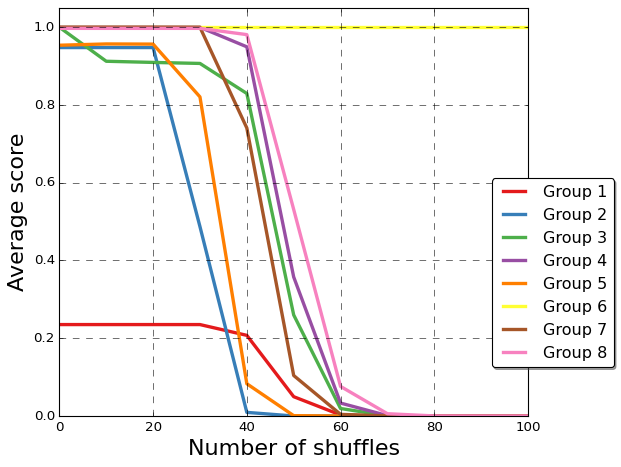

results/results_6_5_2_0.csv
results/results_6_5_2_10.csv
results/results_6_5_2_20.csv
results/results_6_5_2_30.csv
results/results_6_5_2_40.csv
results/results_6_5_2_50.csv
results/results_6_5_2_60.csv
results/results_6_5_2_70.csv
results/results_6_5_2_80.csv
results/results_6_5_2_90.csv
results/results_6_5_2_100.csv
results/results_7_5_2_0.csv
results/results_7_5_2_10.csv
results/results_7_5_2_20.csv
results/results_7_5_2_30.csv
results/results_7_5_2_40.csv
results/results_7_5_2_50.csv
results/results_7_5_2_60.csv
results/results_7_5_2_70.csv
results/results_7_5_2_80.csv
results/results_7_5_2_90.csv
results/results_7_5_2_100.csv
Domain 5


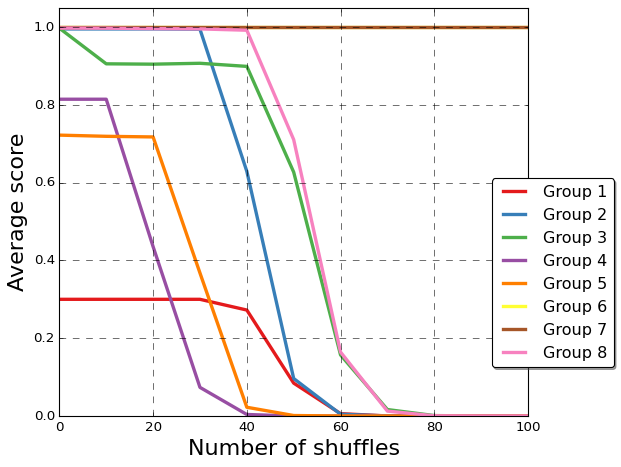

results/results_6_6_2_0.csv
results/results_6_6_2_10.csv
results/results_6_6_2_20.csv
results/results_6_6_2_30.csv
results/results_6_6_2_40.csv
results/results_6_6_2_50.csv
results/results_6_6_2_60.csv
results/results_6_6_2_70.csv
results/results_6_6_2_80.csv
results/results_6_6_2_90.csv
results/results_6_6_2_100.csv
results/results_7_6_2_0.csv
results/results_7_6_2_10.csv
results/results_7_6_2_20.csv
results/results_7_6_2_30.csv
results/results_7_6_2_40.csv
results/results_7_6_2_50.csv
results/results_7_6_2_60.csv
results/results_7_6_2_70.csv
results/results_7_6_2_80.csv
results/results_7_6_2_90.csv
results/results_7_6_2_100.csv
Domain 6


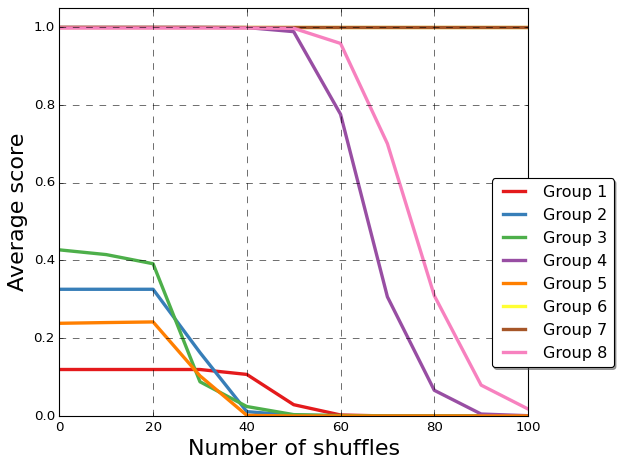

results/results_6_7_2_0.csv
results/results_6_7_2_10.csv
results/results_6_7_2_20.csv
results/results_6_7_2_30.csv
results/results_6_7_2_40.csv
results/results_6_7_2_50.csv
results/results_6_7_2_60.csv
results/results_6_7_2_70.csv
results/results_6_7_2_80.csv
results/results_6_7_2_90.csv
results/results_6_7_2_100.csv
results/results_7_7_2_0.csv
results/results_7_7_2_10.csv
results/results_7_7_2_20.csv
results/results_7_7_2_30.csv
results/results_7_7_2_40.csv
results/results_7_7_2_50.csv
results/results_7_7_2_60.csv
results/results_7_7_2_70.csv
results/results_7_7_2_80.csv
results/results_7_7_2_90.csv
results/results_7_7_2_100.csv
Domain 7


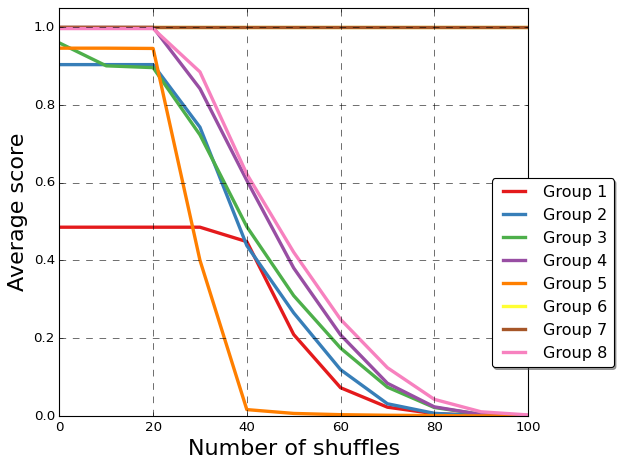

results/results_6_8_2_0.csv
results/results_6_8_2_10.csv
results/results_6_8_2_20.csv
results/results_6_8_2_30.csv
results/results_6_8_2_40.csv
results/results_6_8_2_50.csv
results/results_6_8_2_60.csv
results/results_6_8_2_70.csv
results/results_6_8_2_80.csv
results/results_6_8_2_90.csv
results/results_6_8_2_100.csv
Domain 8


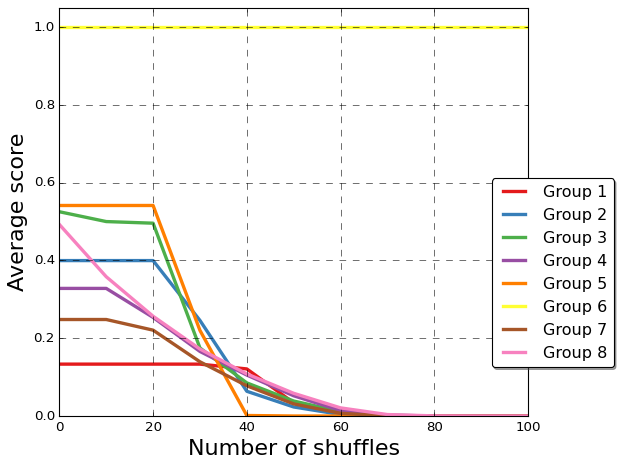

results/results_1_nulls_0.csv
results/results_2_nulls_0.csv
results/results_3_nulls_0.csv
results/results_4_nulls_0.csv
results/results_5_nulls_0.csv
results/results_6_nulls_0.csv
results/results_6_nulls_10.csv
results/results_6_nulls_20.csv
results/results_6_nulls_30.csv
results/results_6_nulls_40.csv
results/results_6_nulls_50.csv
results/results_6_nulls_60.csv
results/results_6_nulls_70.csv
results/results_6_nulls_80.csv
results/results_6_nulls_90.csv
results/results_6_nulls_100.csv
results/results_7_nulls_0.csv
results/results_8_nulls_0.csv
Domain 9


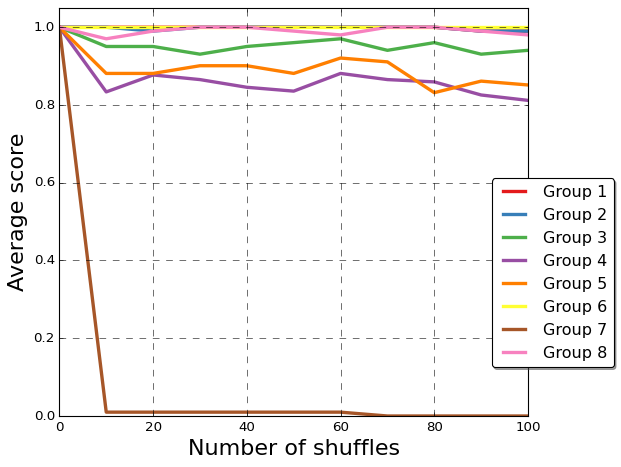

In [131]:
# Fix domain, compare groups across n

domains = np.arange(9) + 1
for domain in domains:
    groups = np.arange(8) + 1
    ns = np.array(list(range(0, 110, 10)))

    labels = ['Group '+str(g) for g in groups]


    scores = np.zeros((groups.shape[0], ns.shape[0]))
    for i in range(groups.shape[0]):
        for j in range(ns.shape[0]):
            scores[i, j] = score(groups[i], domain, batch, ns[j]).mean()
    
    print(f'Domain {domain}')
    plot2d(scores, ns, labels, ylabel='Average score', xlabel='Number of shuffles')

results/results_6_1_2_40.csv
results/results_6_1_2_50.csv
results/results_6_1_2_60.csv
results/results_6_1_2_70.csv
results/results_6_1_2_80.csv
results/results_6_1_2_90.csv
results/results_6_1_2_100.csv
Domain 1


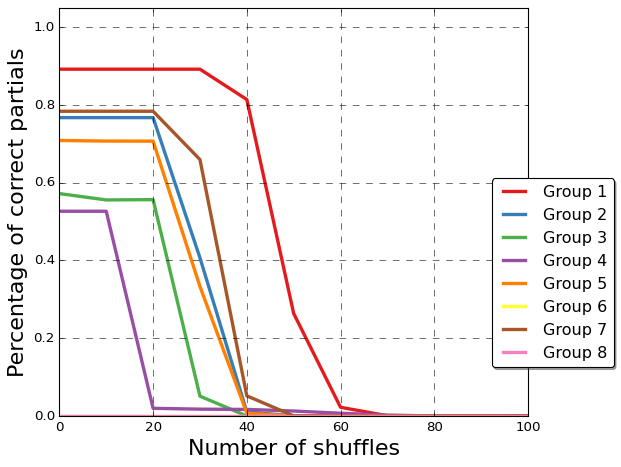

results/results_6_2_2_0.csv
results/results_6_2_2_10.csv
results/results_6_2_2_20.csv
results/results_6_2_2_30.csv
results/results_6_2_2_40.csv
results/results_6_2_2_50.csv
results/results_6_2_2_60.csv
results/results_6_2_2_70.csv
results/results_6_2_2_80.csv
results/results_6_2_2_90.csv
results/results_6_2_2_100.csv
Domain 2


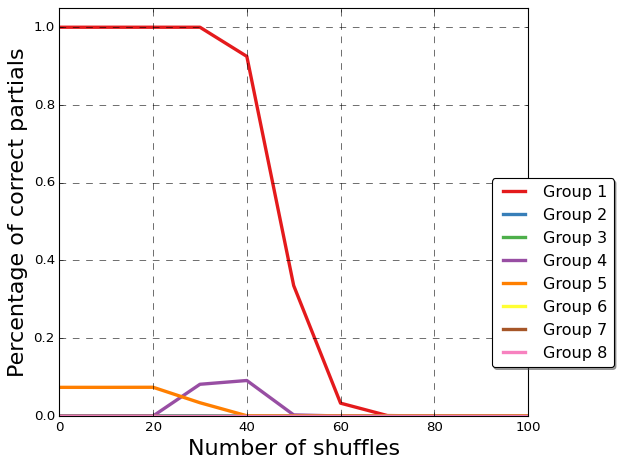

results/results_6_3_2_0.csv
results/results_6_3_2_10.csv
results/results_6_3_2_20.csv
results/results_6_3_2_30.csv
results/results_6_3_2_40.csv
results/results_6_3_2_50.csv
results/results_6_3_2_60.csv
results/results_6_3_2_70.csv
results/results_6_3_2_80.csv
results/results_6_3_2_90.csv
results/results_6_3_2_100.csv
Domain 3


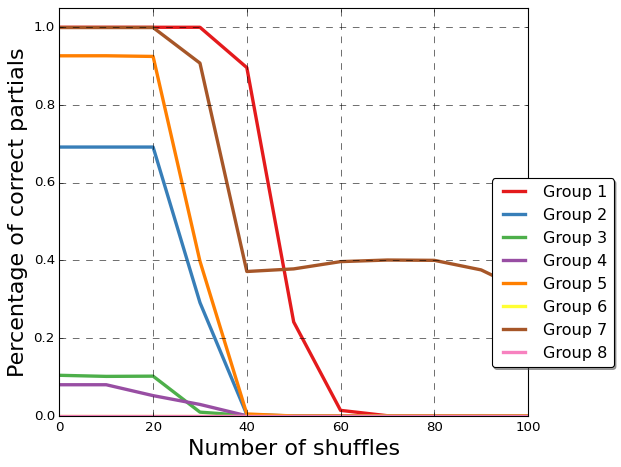

results/results_6_4_2_0.csv
results/results_6_4_2_10.csv
results/results_6_4_2_20.csv
results/results_6_4_2_30.csv
results/results_6_4_2_40.csv
results/results_6_4_2_50.csv
results/results_6_4_2_60.csv
results/results_6_4_2_70.csv
results/results_6_4_2_80.csv
results/results_6_4_2_90.csv
results/results_6_4_2_100.csv
Domain 4


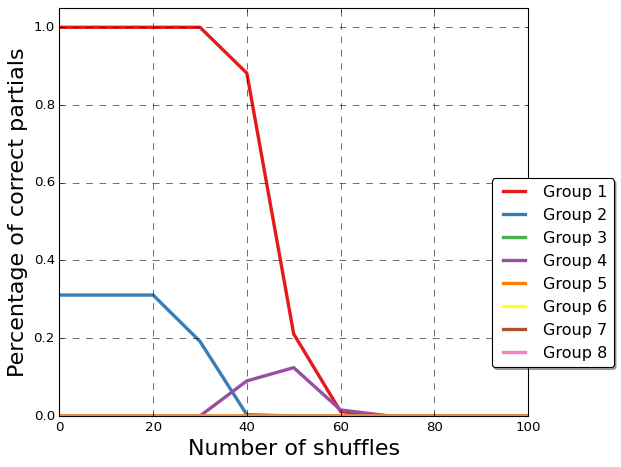

results/results_6_5_2_0.csv
results/results_6_5_2_10.csv
results/results_6_5_2_20.csv
results/results_6_5_2_30.csv
results/results_6_5_2_40.csv
results/results_6_5_2_50.csv
results/results_6_5_2_60.csv
results/results_6_5_2_70.csv
results/results_6_5_2_80.csv
results/results_6_5_2_90.csv
results/results_6_5_2_100.csv
results/results_7_5_2_0.csv
results/results_7_5_2_10.csv
results/results_7_5_2_20.csv
results/results_7_5_2_30.csv
results/results_7_5_2_40.csv
results/results_7_5_2_50.csv
results/results_7_5_2_60.csv
results/results_7_5_2_70.csv
results/results_7_5_2_80.csv
results/results_7_5_2_90.csv
results/results_7_5_2_100.csv
Domain 5


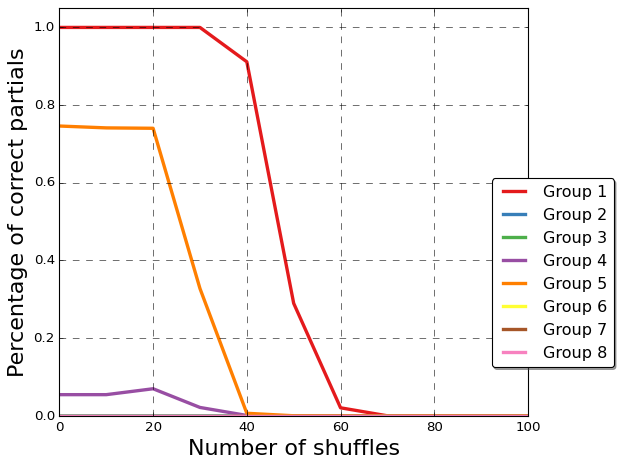

results/results_6_6_2_0.csv
results/results_6_6_2_10.csv
results/results_6_6_2_20.csv
results/results_6_6_2_30.csv
results/results_6_6_2_40.csv
results/results_6_6_2_50.csv
results/results_6_6_2_60.csv
results/results_6_6_2_70.csv
results/results_6_6_2_80.csv
results/results_6_6_2_90.csv
results/results_6_6_2_100.csv
results/results_7_6_2_0.csv
results/results_7_6_2_10.csv
results/results_7_6_2_20.csv
results/results_7_6_2_30.csv
results/results_7_6_2_40.csv
results/results_7_6_2_50.csv
results/results_7_6_2_60.csv
results/results_7_6_2_70.csv
results/results_7_6_2_80.csv
results/results_7_6_2_90.csv
results/results_7_6_2_100.csv
Domain 6


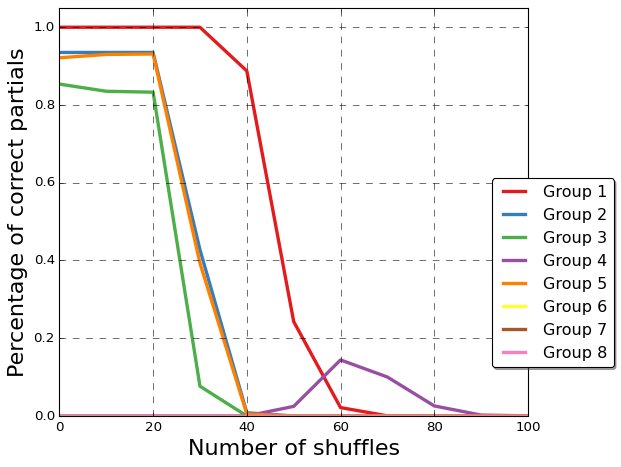

results/results_6_7_2_0.csv
results/results_6_7_2_10.csv
results/results_6_7_2_20.csv
results/results_6_7_2_30.csv
results/results_6_7_2_40.csv
results/results_6_7_2_50.csv
results/results_6_7_2_60.csv
results/results_6_7_2_70.csv
results/results_6_7_2_80.csv
results/results_6_7_2_90.csv
results/results_6_7_2_100.csv
results/results_7_7_2_0.csv
results/results_7_7_2_10.csv
results/results_7_7_2_20.csv
results/results_7_7_2_30.csv
results/results_7_7_2_40.csv
results/results_7_7_2_50.csv
results/results_7_7_2_60.csv
results/results_7_7_2_70.csv
results/results_7_7_2_80.csv
results/results_7_7_2_90.csv
results/results_7_7_2_100.csv
Domain 7


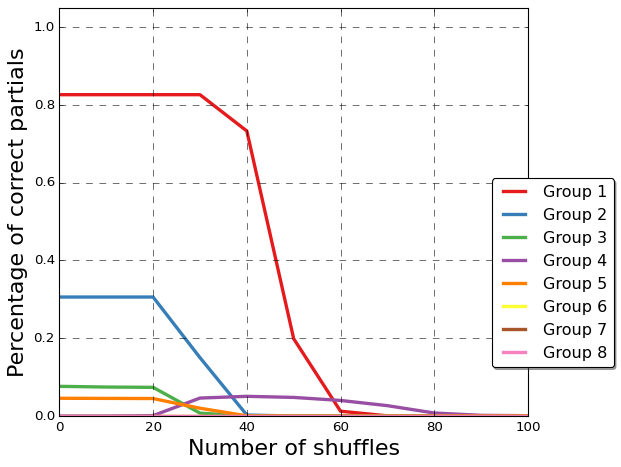

results/results_6_8_2_0.csv
results/results_6_8_2_10.csv
results/results_6_8_2_20.csv
results/results_6_8_2_30.csv
results/results_6_8_2_40.csv
results/results_6_8_2_50.csv
results/results_6_8_2_60.csv
results/results_6_8_2_70.csv
results/results_6_8_2_80.csv
results/results_6_8_2_90.csv
results/results_6_8_2_100.csv
Domain 8


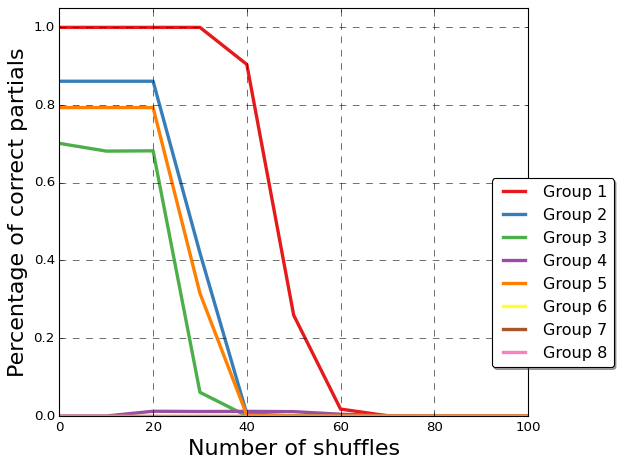

results/results_1_nulls_0.csv
results/results_2_nulls_0.csv
results/results_3_nulls_0.csv
results/results_4_nulls_0.csv
results/results_5_nulls_0.csv
results/results_6_nulls_0.csv
results/results_6_nulls_10.csv
results/results_6_nulls_20.csv
results/results_6_nulls_30.csv
results/results_6_nulls_40.csv
results/results_6_nulls_50.csv
results/results_6_nulls_60.csv
results/results_6_nulls_70.csv
results/results_6_nulls_80.csv
results/results_6_nulls_90.csv
results/results_6_nulls_100.csv
results/results_7_nulls_0.csv
results/results_8_nulls_0.csv
Domain 9


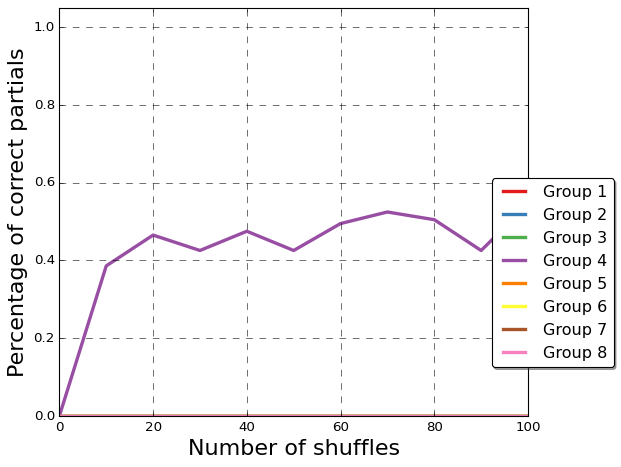

In [132]:
# partial percentage
domains = np.arange(9) + 1
for domain in domains:
    groups = np.arange(8) + 1
    ns = np.array(list(range(0, 110, 10)))

    labels = ['Group '+str(g) for g in groups]


    scores = np.zeros((groups.shape[0], ns.shape[0]))
    for i in range(groups.shape[0]):
        for j in range(ns.shape[0]):
            s = score(groups[i], domain, batch, ns[j])
            scores[i, j] = s[s*(1-s)>0].shape[0] / s.shape[0]
    
    print(f'Domain {domain}')
    plot2d(scores, ns, labels, ylabel='Percentage of correct partials', xlabel='Number of shuffles')